In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd

In [59]:
data = pd.read_parquet("generated_files/bio_variables_dataframe_occurence_and_abscence.parquet").drop(columns=['Latitude','Longitude'])

In [60]:
cols_1 = ['01_annual_mean_temp', '10_mean_temp_warmest_quarter',
       '11_mean_temp_coldest_quarter', '12_annual_precipitation',
       '13_precipitation_wettest_month', '14_precipitation_driest_month',
       '15_precipitation_seasonality', '16_precipitation_of_wettest_quarter',
       '17_precipitation_of_driest_quarter',
       '18_precipitation_of_warmest_quarter',
       '19_precipitation_of_coldest_quarter', '02_mean_diurnal_range',
       '03_isothermality', '04_temperature_seasonality',
       '05_maximum_temp_warmest_month', '06_minimum_temp_coldest_month',
       '07_temp_annual_range', '08_mean_temp_wettest_quarter',
       '09_mean_temp_driest_quarter']

In [61]:
X = pd.DataFrame(normalize(data[cols_1]), columns = cols_1)
y = data['presence']

In [62]:
# ML 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import model_selection 
from sklearn import metrics
import matplotlib.pyplot as plt

In [63]:
# ML classifier dictionary: name: (model)
CLASS_MAP = {
    'RF': (RandomForestClassifier()), 
    'ET': (ExtraTreesClassifier()), 
    'ADA' : (AdaBoostClassifier()), 
    'BAG' : (BaggingClassifier()), 
    'GRA' : (GradientBoostingClassifier()), 
    'XGB': (XGBClassifier()), 
    'LGBM': (LGBMClassifier()), 
    'Maxent':(LogisticRegression()), 
    }

In [64]:
# ROC 
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [65]:
# Classifier evaluation functions (modify pyimpute function)
def evaluate_clf(
    clf, X, y, name, k=None, test_size=0.2, scoring="f1_weighted", feature_names=None
):
    X_train, X_test, y_train, y_true = model_selection.train_test_split(
        X, y,
        test_size=test_size, # Test data size
        shuffle=True, # Shuffle the data before split
        stratify=y # Keeping the appearance/non-appearance ratio of Y
    )

    if k: # Cross-validation
        kf = model_selection.KFold(n_splits=k) # k-fold
        scores = model_selection.cross_val_score(clf, X_train, y_train, cv=kf, scoring=scoring)
        print(name + " %d-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)"
              % (k, scores.mean() * 100, scores.std() * 200))
        print()
    
    clf.fit(X_train, y_train) # Training of classifiers
    y_pred = clf.predict(X_test) # Classifier predictions
    
    # Classifier evaluation metrics
    print("Accuracy Score: %.2f" % metrics.accuracy_score(y_true, y_pred))
    print()

    print("Classification report")
    print(metrics.classification_report(y_true, y_pred))
    print()

    print("Confussion matrix")
    print(metrics.confusion_matrix(y_true, y_pred))
    print()
    
    print('AUC(ROC): %.2f'% metrics.roc_auc_score(y_true, y_pred))
    print()
       
    # ROC 
    probs = clf.predict_proba(X_test) 
    prob = probs[:, 1]  
    fper, tper, thresholds = metrics.roc_curve(y_true, prob)
    plot_roc_curve(fper, tper)

    if hasattr(clf, "feature_importances_"):
        print("Feature importances")
        for f, imp in zip(feature_names, clf.feature_importances_):
            print("%20s: %s" % (f, round(imp * 100, 1)))
        print()

In [66]:
small_columns = ['01_annual_mean_temp',
       '12_annual_precipitation',
       '04_temperature_seasonality',
       '06_minimum_temp_coldest_month',
       '07_temp_annual_range']

In [67]:
even_smaller_columns = ['01_annual_mean_temp',
       '12_annual_precipitation']

RF 5-fold Cross Validation Accuracy: 93.83 (+/- 1.39)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       141
           1       0.96      0.98      0.97       570

    accuracy                           0.95       711
   macro avg       0.94      0.92      0.93       711
weighted avg       0.95      0.95      0.95       711


Confussion matrix
[[120  21]
 [ 11 559]]

AUC(ROC): 0.92



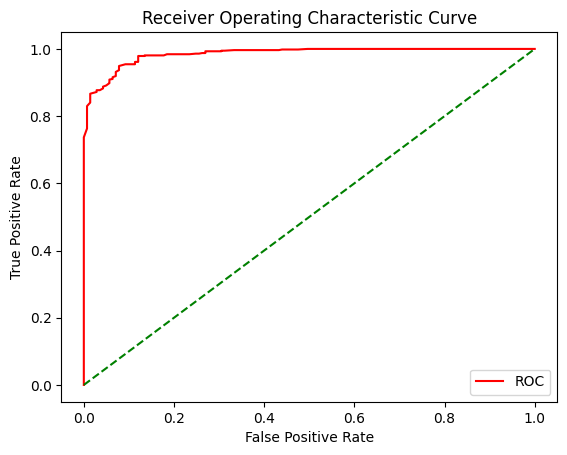

Feature importances
 01_annual_mean_temp: 8.8
10_mean_temp_warmest_quarter: 6.6
11_mean_temp_coldest_quarter: 9.2
12_annual_precipitation: 3.2
13_precipitation_wettest_month: 2.7
14_precipitation_driest_month: 4.5
15_precipitation_seasonality: 3.0
16_precipitation_of_wettest_quarter: 3.8
17_precipitation_of_driest_quarter: 3.5
18_precipitation_of_warmest_quarter: 6.9
19_precipitation_of_coldest_quarter: 3.2
02_mean_diurnal_range: 4.3
    03_isothermality: 4.3
04_temperature_seasonality: 5.3
05_maximum_temp_warmest_month: 10.0
06_minimum_temp_coldest_month: 5.7
07_temp_annual_range: 3.2
08_mean_temp_wettest_quarter: 3.7
09_mean_temp_driest_quarter: 8.2

ET 5-fold Cross Validation Accuracy: 93.86 (+/- 1.19)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       141
           1       0.96      0.98      0.97       570

    accuracy                           0.95       711
   macro avg       0.9

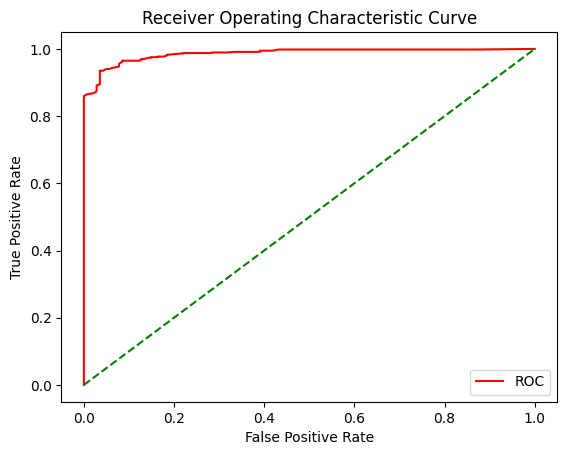

Feature importances
 01_annual_mean_temp: 5.7
10_mean_temp_warmest_quarter: 6.3
11_mean_temp_coldest_quarter: 6.0
12_annual_precipitation: 4.1
13_precipitation_wettest_month: 4.2
14_precipitation_driest_month: 5.4
15_precipitation_seasonality: 4.4
16_precipitation_of_wettest_quarter: 4.7
17_precipitation_of_driest_quarter: 4.9
18_precipitation_of_warmest_quarter: 5.4
19_precipitation_of_coldest_quarter: 4.6
02_mean_diurnal_range: 4.5
    03_isothermality: 6.1
04_temperature_seasonality: 5.4
05_maximum_temp_warmest_month: 6.0
06_minimum_temp_coldest_month: 6.1
07_temp_annual_range: 4.6
08_mean_temp_wettest_quarter: 4.5
09_mean_temp_driest_quarter: 7.1



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scra

ADA 5-fold Cross Validation Accuracy: 91.94 (+/- 1.65)



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.92

Classification report
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       141
           1       0.94      0.95      0.95       570

    accuracy                           0.92       711
   macro avg       0.87      0.86      0.87       711
weighted avg       0.92      0.92      0.92       711


Confussion matrix
[[109  32]
 [ 27 543]]

AUC(ROC): 0.86



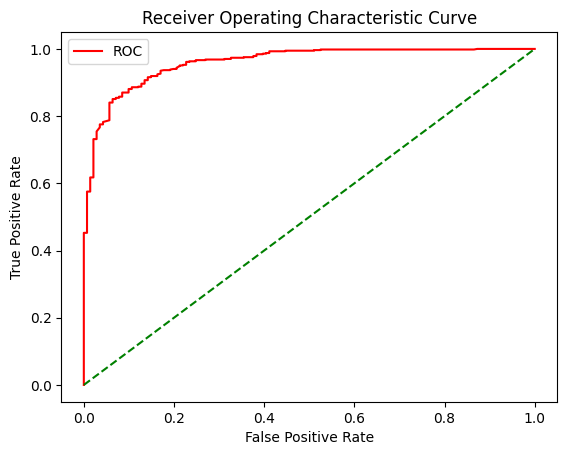

Feature importances
 01_annual_mean_temp: 6.0
10_mean_temp_warmest_quarter: 0.0
11_mean_temp_coldest_quarter: 8.0
12_annual_precipitation: 6.0
13_precipitation_wettest_month: 8.0
14_precipitation_driest_month: 4.0
15_precipitation_seasonality: 2.0
16_precipitation_of_wettest_quarter: 6.0
17_precipitation_of_driest_quarter: 0.0
18_precipitation_of_warmest_quarter: 18.0
19_precipitation_of_coldest_quarter: 4.0
02_mean_diurnal_range: 4.0
    03_isothermality: 0.0
04_temperature_seasonality: 10.0
05_maximum_temp_warmest_month: 0.0
06_minimum_temp_coldest_month: 8.0
07_temp_annual_range: 6.0
08_mean_temp_wettest_quarter: 2.0
09_mean_temp_driest_quarter: 8.0

BAG 5-fold Cross Validation Accuracy: 93.03 (+/- 2.07)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       141
           1       0.96      0.98      0.97       570

    accuracy                           0.95       711
   macro avg       0

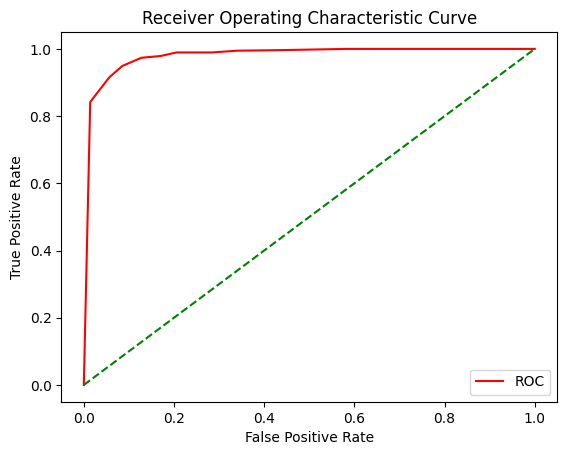

GRA 5-fold Cross Validation Accuracy: 93.58 (+/- 3.02)

Accuracy Score: 0.93

Classification report
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       141
           1       0.94      0.97      0.96       570

    accuracy                           0.93       711
   macro avg       0.90      0.86      0.88       711
weighted avg       0.92      0.93      0.92       711


Confussion matrix
[[106  35]
 [ 17 553]]

AUC(ROC): 0.86



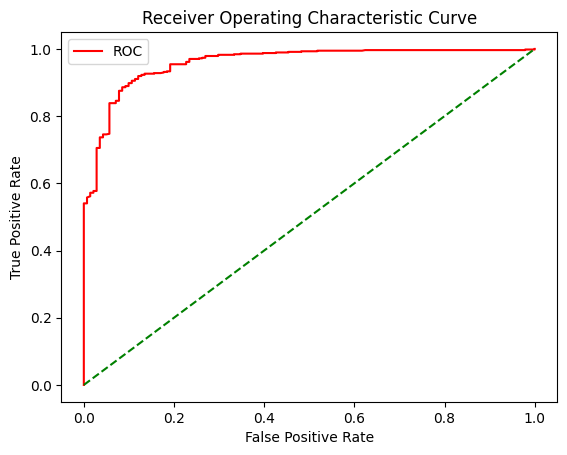

Feature importances
 01_annual_mean_temp: 37.8
10_mean_temp_warmest_quarter: 0.7
11_mean_temp_coldest_quarter: 7.5
12_annual_precipitation: 2.7
13_precipitation_wettest_month: 1.5
14_precipitation_driest_month: 3.9
15_precipitation_seasonality: 1.6
16_precipitation_of_wettest_quarter: 2.1
17_precipitation_of_driest_quarter: 0.7
18_precipitation_of_warmest_quarter: 15.0
19_precipitation_of_coldest_quarter: 1.6
02_mean_diurnal_range: 2.1
    03_isothermality: 1.6
04_temperature_seasonality: 4.2
05_maximum_temp_warmest_month: 0.6
06_minimum_temp_coldest_month: 6.5
07_temp_annual_range: 2.5
08_mean_temp_wettest_quarter: 0.6
09_mean_temp_driest_quarter: 6.6

XGB 5-fold Cross Validation Accuracy: 94.16 (+/- 1.96)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       141
           1       0.95      0.98      0.97       570

    accuracy                           0.94       711
   macro avg       0

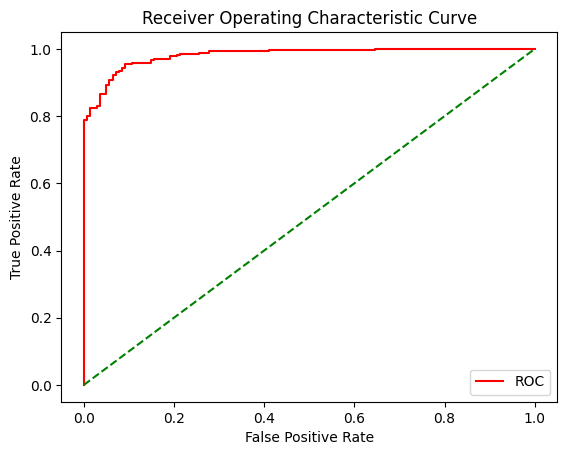

Feature importances
 01_annual_mean_temp: 27.3
10_mean_temp_warmest_quarter: 1.3
11_mean_temp_coldest_quarter: 21.0
12_annual_precipitation: 2.0
13_precipitation_wettest_month: 1.3
14_precipitation_driest_month: 2.3
15_precipitation_seasonality: 2.6
16_precipitation_of_wettest_quarter: 2.2
17_precipitation_of_driest_quarter: 1.8
18_precipitation_of_warmest_quarter: 8.0
19_precipitation_of_coldest_quarter: 4.9
02_mean_diurnal_range: 3.2
    03_isothermality: 3.1
04_temperature_seasonality: 2.3
05_maximum_temp_warmest_month: 1.4
06_minimum_temp_coldest_month: 6.1
07_temp_annual_range: 2.1
08_mean_temp_wettest_quarter: 1.2
09_mean_temp_driest_quarter: 5.9

[LightGBM] [Info] Number of positive: 1809, number of negative: 463
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 2272, number of 

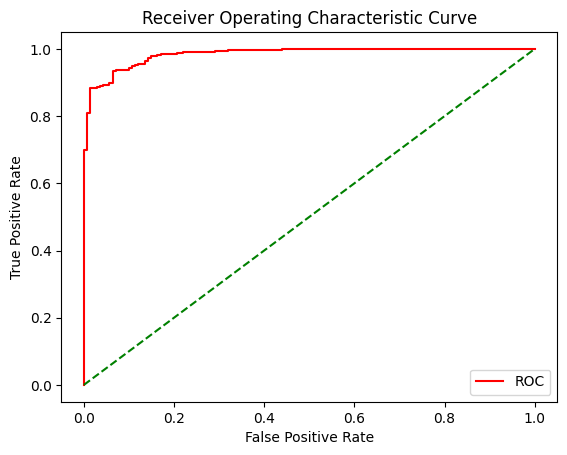

Feature importances
 01_annual_mean_temp: 9400
10_mean_temp_warmest_quarter: 7300
11_mean_temp_coldest_quarter: 16200
12_annual_precipitation: 22000
13_precipitation_wettest_month: 20200
14_precipitation_driest_month: 18400
15_precipitation_seasonality: 14700
16_precipitation_of_wettest_quarter: 17100
17_precipitation_of_driest_quarter: 10900
18_precipitation_of_warmest_quarter: 25500
19_precipitation_of_coldest_quarter: 14000
02_mean_diurnal_range: 21500
    03_isothermality: 16300
04_temperature_seasonality: 23100
05_maximum_temp_warmest_month: 8300
06_minimum_temp_coldest_month: 14900
07_temp_annual_range: 18300
08_mean_temp_wettest_quarter: 6700
09_mean_temp_driest_quarter: 15200

Maxent 5-fold Cross Validation Accuracy: 72.80 (+/- 5.92)

Accuracy Score: 0.81

Classification report
              precision    recall  f1-score   support

           0       0.83      0.04      0.07       141
           1       0.81      1.00      0.89       570

    accuracy                           

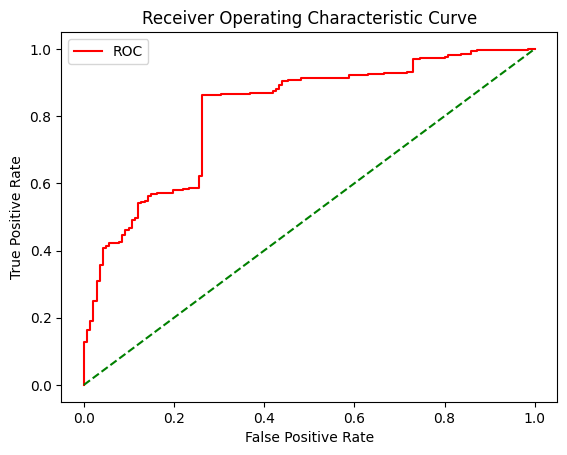

In [68]:
# Spatial prediction
for name, model in CLASS_MAP.items():
    evaluate_clf(model, X, y, name, k=5, test_size=0.2, scoring="f1_weighted", feature_names=X.columns)



RF 5-fold Cross Validation Accuracy: 93.52 (+/- 2.26)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       141
           1       0.95      0.99      0.97       570

    accuracy                           0.95       711
   macro avg       0.95      0.89      0.92       711
weighted avg       0.95      0.95      0.95       711


Confussion matrix
[[112  29]
 [  6 564]]

AUC(ROC): 0.89



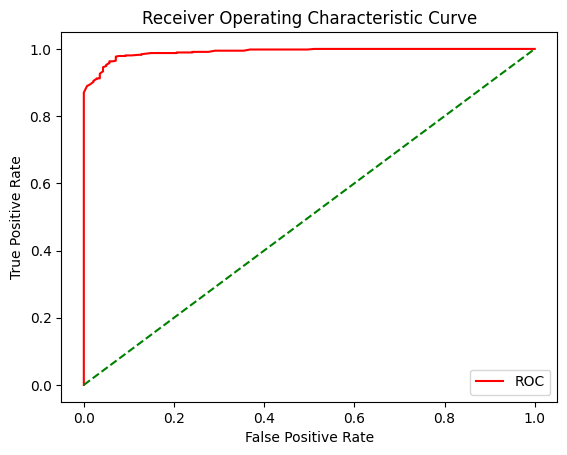

Feature importances
 01_annual_mean_temp: 6.8
12_annual_precipitation: 7.3

ET 5-fold Cross Validation Accuracy: 93.73 (+/- 1.69)

Accuracy Score: 0.96

Classification report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       141
           1       0.98      0.98      0.98       570

    accuracy                           0.96       711
   macro avg       0.94      0.94      0.94       711
weighted avg       0.96      0.96      0.96       711


Confussion matrix
[[127  14]
 [ 14 556]]

AUC(ROC): 0.94



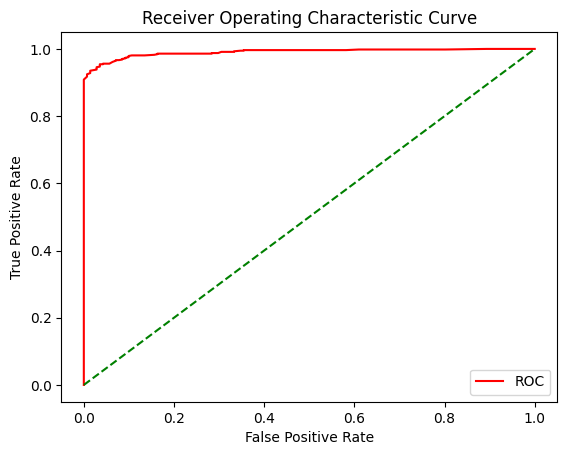

Feature importances
 01_annual_mean_temp: 6.4
12_annual_precipitation: 6.6



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scra

ADA 5-fold Cross Validation Accuracy: 91.83 (+/- 1.75)



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.93

Classification report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       141
           1       0.95      0.96      0.96       570

    accuracy                           0.93       711
   macro avg       0.90      0.89      0.89       711
weighted avg       0.93      0.93      0.93       711


Confussion matrix
[[114  27]
 [ 21 549]]

AUC(ROC): 0.89



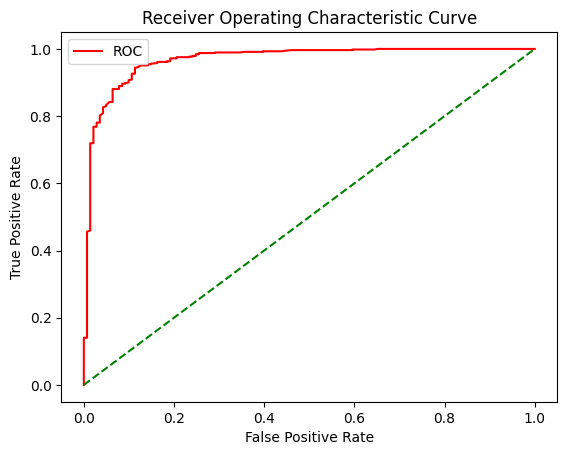

Feature importances
 01_annual_mean_temp: 4.0
12_annual_precipitation: 2.0

BAG 5-fold Cross Validation Accuracy: 94.05 (+/- 1.94)

Accuracy Score: 0.92

Classification report
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       141
           1       0.94      0.97      0.95       570

    accuracy                           0.92       711
   macro avg       0.89      0.85      0.87       711
weighted avg       0.92      0.92      0.92       711


Confussion matrix
[[104  37]
 [ 18 552]]

AUC(ROC): 0.85



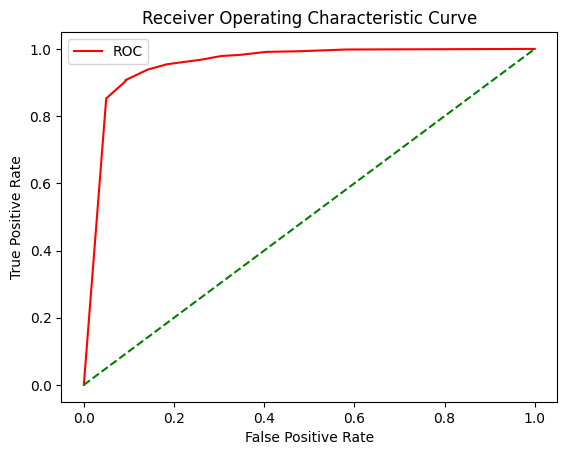

GRA 5-fold Cross Validation Accuracy: 93.01 (+/- 1.61)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       141
           1       0.96      0.98      0.97       570

    accuracy                           0.95       711
   macro avg       0.94      0.91      0.92       711
weighted avg       0.95      0.95      0.95       711


Confussion matrix
[[117  24]
 [ 11 559]]

AUC(ROC): 0.91



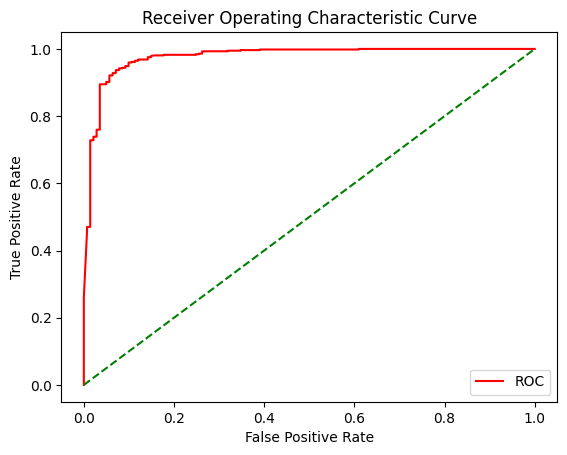

Feature importances
 01_annual_mean_temp: 31.8
12_annual_precipitation: 0.7

XGB 5-fold Cross Validation Accuracy: 93.93 (+/- 1.57)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       141
           1       0.96      0.97      0.96       570

    accuracy                           0.94       711
   macro avg       0.92      0.90      0.91       711
weighted avg       0.94      0.94      0.94       711


Confussion matrix
[[117  24]
 [ 17 553]]

AUC(ROC): 0.90



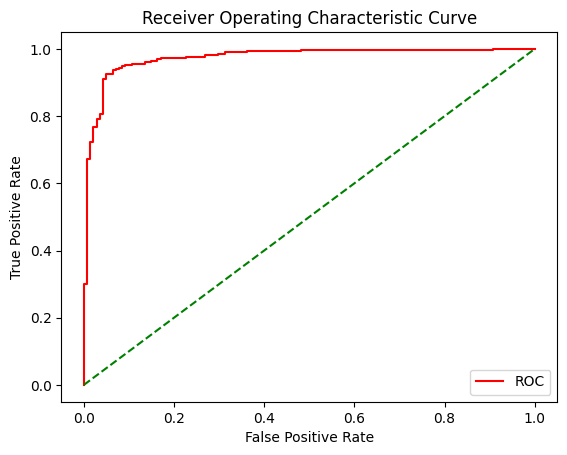

Feature importances
 01_annual_mean_temp: 40.3
12_annual_precipitation: 2.4

[LightGBM] [Info] Number of positive: 1819, number of negative: 453
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 2272, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.800616 -> initscore=1.390150
[LightGBM] [Info] Start training from score 1.390150
[LightGBM] [Info] Number of positive: 1824, number of negative: 449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4840
[LightGBM] [Info] Number of data points in the train set: 2273, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.802464 -> initscore=1.401764


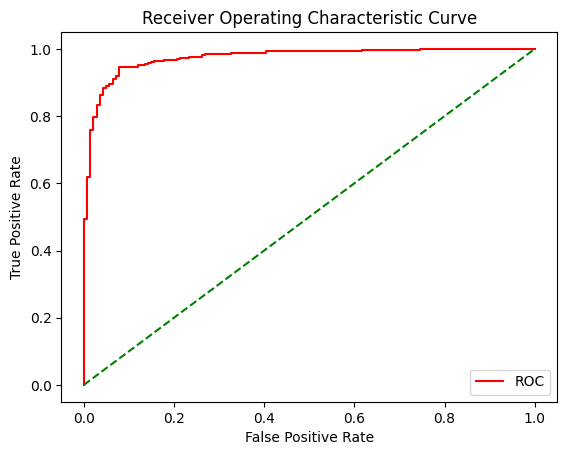

Feature importances
 01_annual_mean_temp: 6700
12_annual_precipitation: 7700

Maxent 5-fold Cross Validation Accuracy: 72.52 (+/- 2.92)

Accuracy Score: 0.81

Classification report
              precision    recall  f1-score   support

           0       0.80      0.06      0.11       141
           1       0.81      1.00      0.89       570

    accuracy                           0.81       711
   macro avg       0.81      0.53      0.50       711
weighted avg       0.81      0.81      0.74       711


Confussion matrix
[[  8 133]
 [  2 568]]

AUC(ROC): 0.53



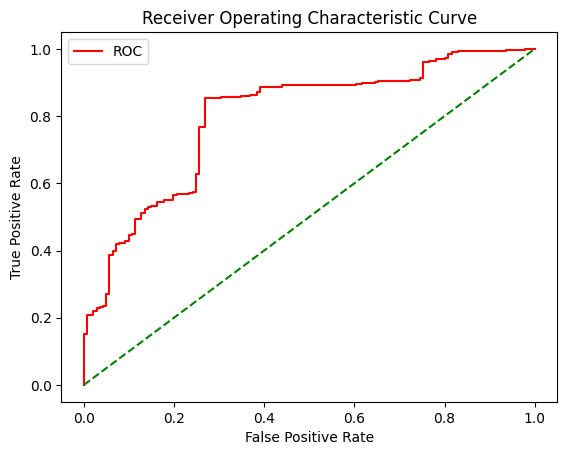

In [69]:
# Spatial prediction
for name, model in CLASS_MAP.items():
    evaluate_clf(model, X, y, name, k=5, test_size=0.2, scoring="f1_weighted", feature_names=even_smaller_columns)

RF 10-fold Cross Validation Accuracy: 94.45 (+/- 2.88)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       141
           1       0.94      0.98      0.96       570

    accuracy                           0.94       711
   macro avg       0.92      0.87      0.89       711
weighted avg       0.94      0.94      0.93       711


Confussion matrix
[[108  33]
 [ 12 558]]

AUC(ROC): 0.87



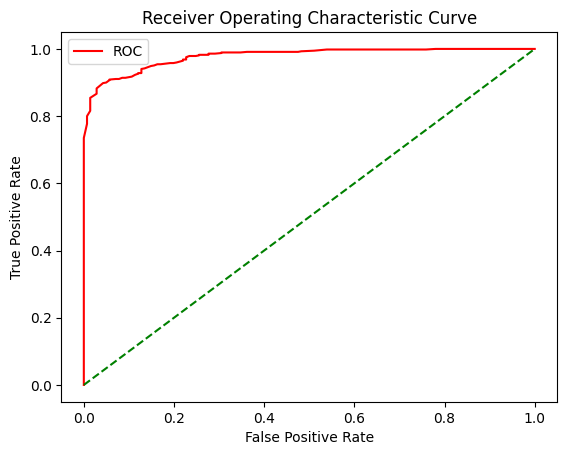

Feature importances
 01_annual_mean_temp: 11.4
12_annual_precipitation: 8.1
04_temperature_seasonality: 7.5
06_minimum_temp_coldest_month: 2.8
07_temp_annual_range: 2.6

ET 10-fold Cross Validation Accuracy: 94.32 (+/- 3.01)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       141
           1       0.96      0.98      0.97       570

    accuracy                           0.95       711
   macro avg       0.93      0.91      0.92       711
weighted avg       0.95      0.95      0.95       711


Confussion matrix
[[118  23]
 [ 12 558]]

AUC(ROC): 0.91



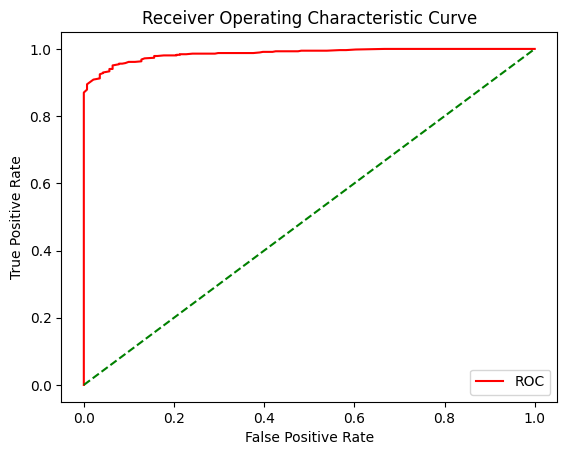

Feature importances
 01_annual_mean_temp: 7.3
12_annual_precipitation: 5.9
04_temperature_seasonality: 6.7
06_minimum_temp_coldest_month: 4.4
07_temp_annual_range: 3.8



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scra

ADA 10-fold Cross Validation Accuracy: 91.69 (+/- 3.61)



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.92

Classification report
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       141
           1       0.94      0.96      0.95       570

    accuracy                           0.92       711
   macro avg       0.88      0.86      0.87       711
weighted avg       0.92      0.92      0.92       711


Confussion matrix
[[106  35]
 [ 23 547]]

AUC(ROC): 0.86



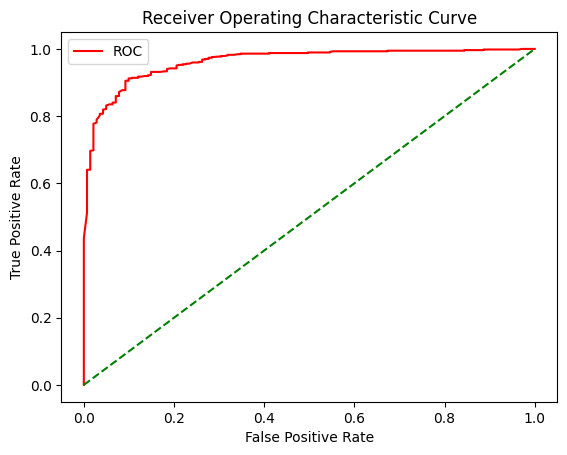

Feature importances
 01_annual_mean_temp: 2.0
12_annual_precipitation: 4.0
04_temperature_seasonality: 6.0
06_minimum_temp_coldest_month: 10.0
07_temp_annual_range: 6.0

BAG 10-fold Cross Validation Accuracy: 93.28 (+/- 4.25)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       141
           1       0.95      0.98      0.96       570

    accuracy                           0.94       711
   macro avg       0.92      0.88      0.90       711
weighted avg       0.94      0.94      0.94       711


Confussion matrix
[[111  30]
 [ 14 556]]

AUC(ROC): 0.88



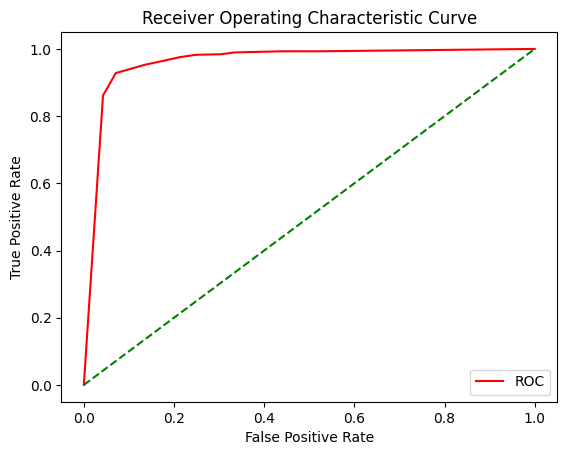

GRA 10-fold Cross Validation Accuracy: 93.71 (+/- 3.64)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       141
           1       0.95      0.98      0.96       570

    accuracy                           0.94       711
   macro avg       0.93      0.88      0.90       711
weighted avg       0.94      0.94      0.94       711


Confussion matrix
[[109  32]
 [  9 561]]

AUC(ROC): 0.88



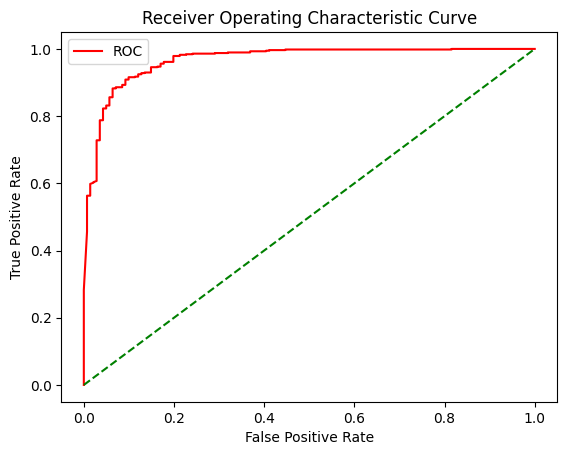

Feature importances
 01_annual_mean_temp: 36.0
12_annual_precipitation: 0.8
04_temperature_seasonality: 9.2
06_minimum_temp_coldest_month: 1.9
07_temp_annual_range: 1.2

XGB 10-fold Cross Validation Accuracy: 93.35 (+/- 2.50)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       141
           1       0.96      0.98      0.97       570

    accuracy                           0.95       711
   macro avg       0.94      0.90      0.92       711
weighted avg       0.95      0.95      0.95       711


Confussion matrix
[[116  25]
 [ 10 560]]

AUC(ROC): 0.90



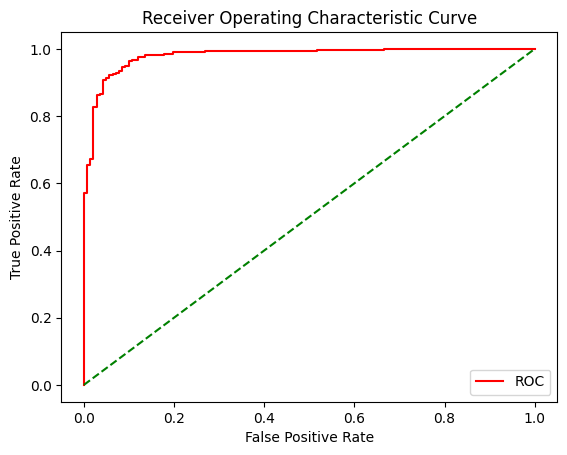

Feature importances
 01_annual_mean_temp: 40.0
12_annual_precipitation: 1.7
04_temperature_seasonality: 18.4
06_minimum_temp_coldest_month: 1.8
07_temp_annual_range: 1.2

[LightGBM] [Info] Number of positive: 2061, number of negative: 495
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 2556, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.806338 -> initscore=1.426389
[LightGBM] [Info] Start training from score 1.426389
[LightGBM] [Info] Number of positive: 2042, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 2557, number of use

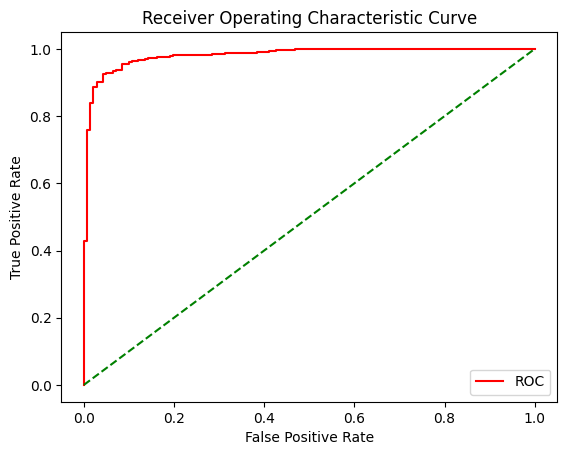

Feature importances
 01_annual_mean_temp: 10300
12_annual_precipitation: 8000
04_temperature_seasonality: 20300
06_minimum_temp_coldest_month: 18400
07_temp_annual_range: 18300

Maxent 10-fold Cross Validation Accuracy: 73.32 (+/- 4.89)

Accuracy Score: 0.81

Classification report
              precision    recall  f1-score   support

           0       1.00      0.06      0.12       141
           1       0.81      1.00      0.90       570

    accuracy                           0.81       711
   macro avg       0.91      0.53      0.51       711
weighted avg       0.85      0.81      0.74       711


Confussion matrix
[[  9 132]
 [  0 570]]

AUC(ROC): 0.53



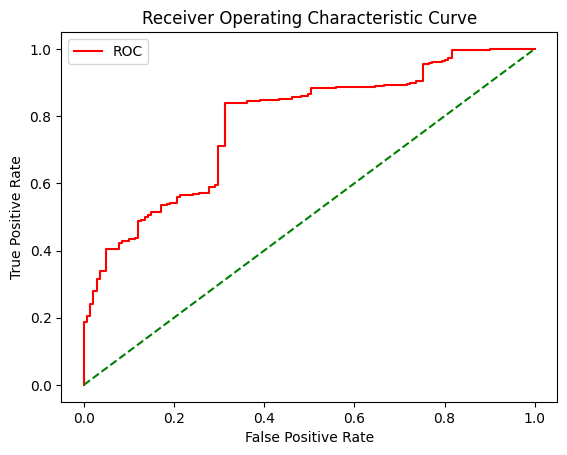

In [70]:
# Spatial prediction
for name, model in CLASS_MAP.items():
    evaluate_clf(model, X, y, name, k=10, test_size=0.2, scoring="f1_weighted", feature_names=small_columns)

